In [1]:
import sys
sys.path.append('/home/sam/git/Fashion_Killer')

In [1]:
from PIL import Image

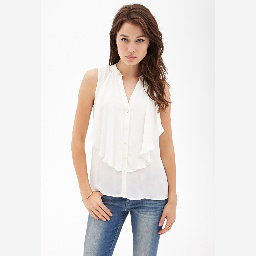

In [8]:
Image.open('/home/sam/data/deepfashion/test/01617_1.jpg')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import torch
import matplotlib.pyplot as plt

In [4]:
from Fashion_Killer.DataLoader import get_Fashion_Killer_DataLoader
from Fashion_Killer.Model.Model import Model

In [5]:
model_path = '/home/sam/experiments/Fashion_Killer/fix_logs_path/models/5.pt'

In [6]:
model = Model()
model.load_state_dict(torch.load(model_path))
model = model.cuda().eval()

In [7]:
dl = get_Fashion_Killer_DataLoader(8)

In [8]:
batch = next(iter(dl))

In [9]:
pose_img = batch['pose_img'].cuda() 
orig_img = batch['orig_img'].cuda()
loc_joints = batch['localised_joints'].float().cuda()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


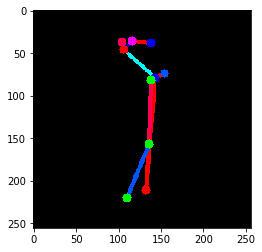

In [11]:
pose_img_unnorm = ((pose_img * 0.5) + 0.5)
plt.imshow(pose_img[3].permute(1, 2, 0).cpu())

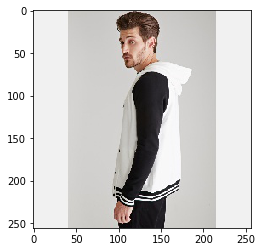

In [12]:
orig_img_unnorm = (orig_img * 0.5) + 0.5
plt.imshow(orig_img_unnorm[0].permute(1, 2, 0).cpu())

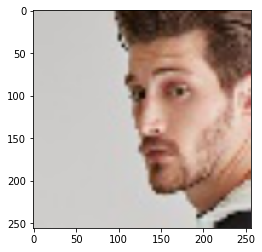

In [14]:
loc_joints_unnorm = ((loc_joints * 0.5) + 0.5)
joint = loc_joints_unnorm[0, 0:3, :, :]
plt.imshow(joint.permute(1, 2, 0).cpu())

In [64]:
desired_pose = pose_img[1].unsqueeze(0)
desired_app = orig_img[0].unsqueeze(0)
desired_app_p = pose_img[0].unsqueeze(0)
desired_app_jl = loc_joints[0].unsqueeze(0)

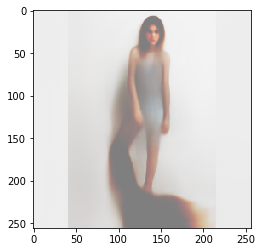

In [65]:
result, _, _, _, _ = model(desired_app, desired_app_p, desired_pose, desired_app_jl)
result = (result * 0.5) + 0.5
plt.imshow(result[0].permute(1, 2, 0).detach().cpu().numpy())